In [1]:
import pandas as pd                                   # file reading and manipulation
import numpy as np                                    # array creation and manipulation
import requests
import json
import pickle
import skfuzzy                                        # fuzzy logic library
from skfuzzy import control as ctrl                   # fuzzy logic
from sklearn.model_selection import train_test_split  # train/test split
from sklearn.model_selection import TimeSeriesSplit

from sklearn.multioutput import MultiOutputRegressor  # Linear Regression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import accuracy_score            # evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import graphviz                                       # visualization
import matplotlib.pyplot as plt                       # plotting

## Preprocessing

In [2]:
df = pd.read_excel("../data/delhi_temperature_trends_merged.xlsx", index_col=0)
df

,tavg,tmin,tmax,prcp,Aloo gobi,Aloo matar,Aloo Methi,Aloo shimla mirch,Aloo tikki,Apple,...,Sohan halwa,Strawberry,Tandoori chicken,Tea,Toast,Upma,Uttapam,Vada,Vegetable Jalfrezi,Watermelon
Week,,,,,,,,,,,,,,,,,,,,,
2018-01-07,11.942857,4.242857,12.228571,0.000000,67,44,21,23,26,36,...,36,0,32,43,30,17,17,27,0,5
2018-01-14,13.657143,6.171429,16.028571,0.000000,59,16,0,15,13,45,...,0,38,62,46,39,20,0,38,0,8
2018-01-21,14.900000,5.871429,10.771429,0.000000,94,24,0,0,11,30,...,15,0,35,44,41,10,0,29,18,4
2018-01-28,13.157143,6.414286,12.614286,0.585714,71,13,29,0,18,35,...,0,0,36,45,18,20,19,22,0,0
2018-02-04,16.457143,9.500000,15.114286,0.000000,44,28,43,0,15,43,...,14,28,0,39,0,29,34,18,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27,17.285714,10.671429,26.485714,0.000000,31,54,0,0,14,63,...,0,0,28,60,0,36,10,21,0,18
2022-12-04,16.385714,10.200000,25.542857,0.000000,32,41,55,0,18,39,...,0,0,45,56,0,10,16,20,42,7
2022-12-11,16.471429,10.257143,25.171429,0.000000,25,37,0,0,22,41,...,0,29,35,61,38,22,30,17,0,14


## Training the Gradient Boosting Regressor Model

In [3]:
x = df.iloc[:, :4].to_numpy()
y = df.iloc[:, 4:].to_numpy()
x.shape, y.shape

((260, 4), (260, 84))

In [4]:
params = {
    "n_estimators": 300,
    "max_depth": 4,
    "learning_rate": 0.1,
    "loss": "squared_error",
}

In [5]:
gb = MultiOutputRegressor(GradientBoostingRegressor(**params)).fit(x, y)
gb.score(x, y)

0.9950673017329044

In [9]:
food_keys = {i:j for i,j in zip(range(len(df.columns[4:])), df.columns[4:])}

In [10]:
with open('../data/food_keys.pickle', 'wb') as handle:
    pickle.dump(food_keys, handle, protocol=pickle.HIGHEST_PROTOCOL)

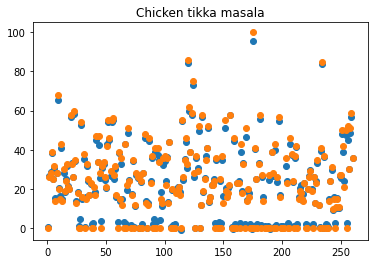

In [11]:
key = 15

plt.figure()
plt.scatter(range(1, 261), [i[key] for i in gb.predict(x)])
plt.scatter(range(1, 261), [i[key] for i in y])
plt.title(food_keys[key])
plt.show()

In [12]:
filename = 'gb.sav'
pickle.dump(gb, open(filename, 'wb'))